In [1]:
import collections
import copy
import itertools
import json
import datetime
import random
import time


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

In [2]:
with open("data/results/python/python_libs_first_dates.json") as handle:
    libs_first_dates = json.load(handle)

with open("data/results/python/python_pairs_first_dates.json") as handle:
    pairs_first_dates = json.load(handle)

In [3]:
dates = {}
stats = collections.defaultdict(int)
for pair in tqdm.tqdm(pairs_first_dates):
    components = pair.split("|")
    if any([comp not in libs_first_dates for comp in components]):
        stats["missing"] += 1
        continue
    
    component_dates = [
        datetime.datetime.strptime(libs_first_dates[lib]["date"], "%Y-%m-%d").date() for lib in components
    ]
    pair_date = datetime.datetime.strptime(pairs_first_dates[pair]["date"], "%Y-%m-%d").date()
    dates[pair] = {
        "component_dates": component_dates,
        "pair_date": pair_date,
        "wait_days": (pair_date - max(component_dates)).days,
        "wait_days_ext": (pair_date - min(component_dates)).days,
        "component_diff": (max(component_dates) - min(component_dates)).days,
    }
    stats["success"] += 1
    

100%|████████████████████████████████| 371121/371121 [00:09<00:00, 40477.91it/s]


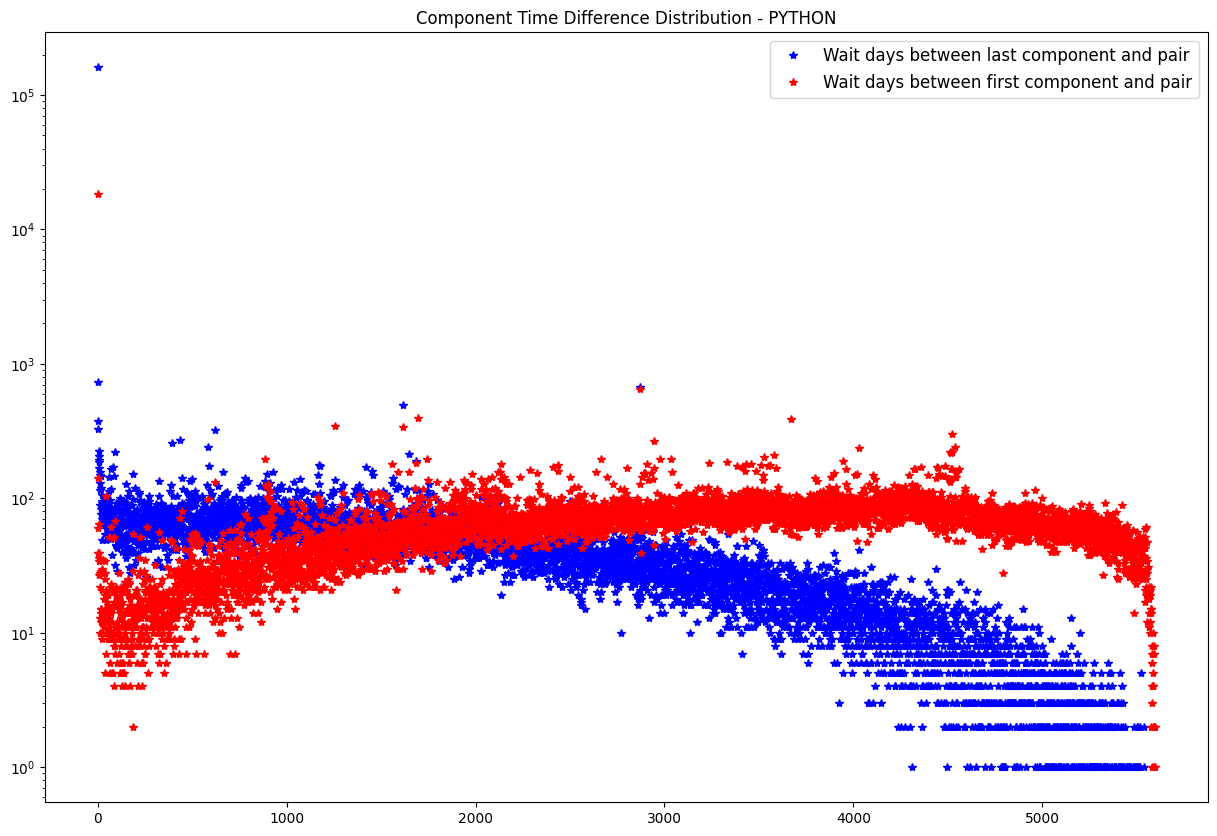

In [4]:
wait_days = collections.Counter([item["wait_days"] for item in dates.values()])
wait_days_ext = collections.Counter([item["wait_days_ext"] for item in dates.values()])

plt.figure(figsize=(15,10))
plt.plot(wait_days.keys(), wait_days.values(), "b*", label="Wait days between last component and pair")
plt.plot(wait_days_ext.keys(), wait_days_ext.values(), "r*", label="Wait days between first component and pair")

plt.title("Component Time Difference Distribution - PYTHON")
plt.semilogy()
plt.legend(fontsize=12)

In [5]:
for name, target in [("wait_days", wait_days), ("wait_days_ext", wait_days_ext)]:
    for i in range(10):
        print(f"{i} {name}-> {round(target[i] / len(dates) * 100, 2)} %.")
    print("*" * 100)

0 wait_days-> 43.33 %.
1 wait_days-> 0.2 %.
2 wait_days-> 0.1 %.
3 wait_days-> 0.09 %.
4 wait_days-> 0.06 %.
5 wait_days-> 0.05 %.
6 wait_days-> 0.06 %.
7 wait_days-> 0.05 %.
8 wait_days-> 0.05 %.
9 wait_days-> 0.04 %.
****************************************************************************************************
0 wait_days_ext-> 4.93 %.
1 wait_days_ext-> 0.04 %.
2 wait_days_ext-> 0.02 %.
3 wait_days_ext-> 0.01 %.
4 wait_days_ext-> 0.01 %.
5 wait_days_ext-> 0.02 %.
6 wait_days_ext-> 0.01 %.
7 wait_days_ext-> 0.01 %.
8 wait_days_ext-> 0.01 %.
9 wait_days_ext-> 0.01 %.
****************************************************************************************************


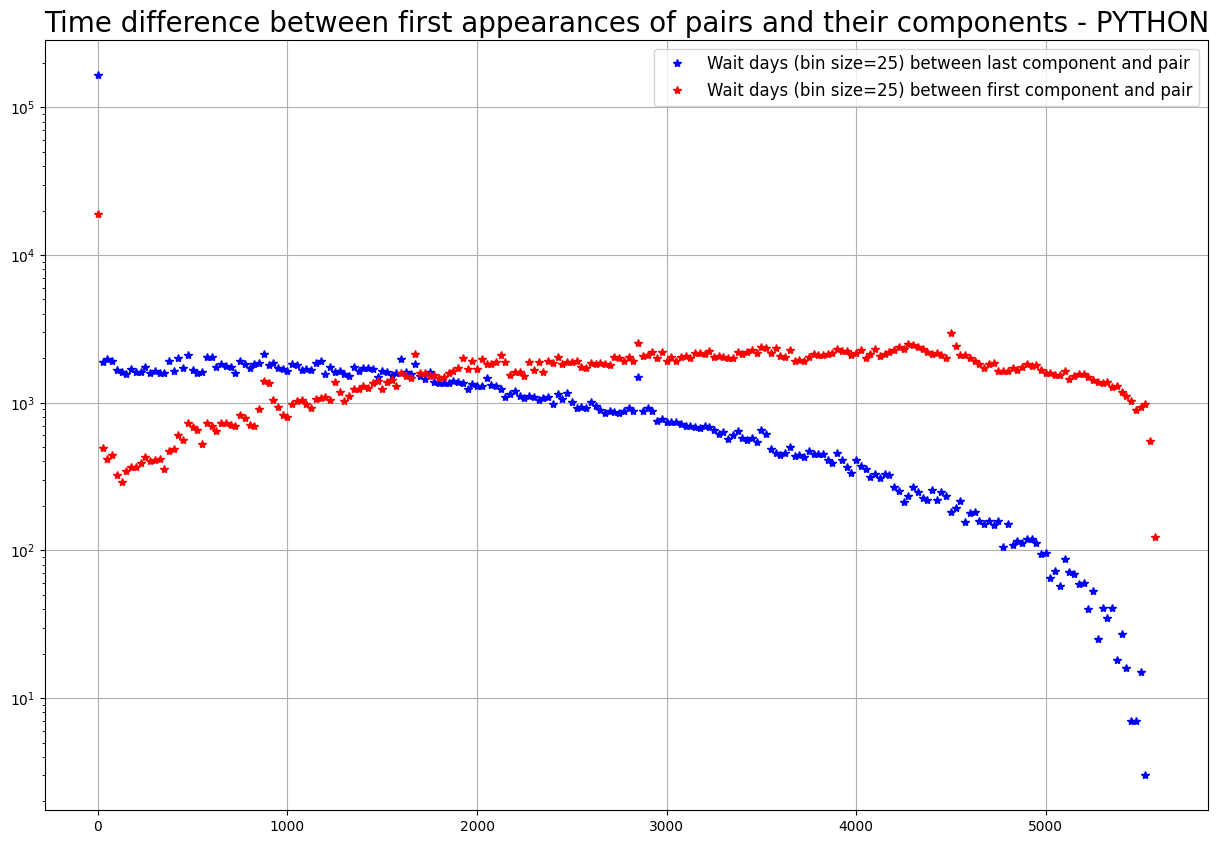

In [9]:
BIN_SIZE = 25
#wait_days = collections.Counter([item["wait_days"] for item in dates.values()])
#wait_days_ext = collections.Counter([item["wait_days_ext"] for item in dates.values()])
wait_days_bin = collections.defaultdict(int)
for k, v in wait_days.items():
    wait_days_bin[k // BIN_SIZE] += v 

wait_days_ext_bin = collections.defaultdict(int)
for k, v in wait_days_ext.items():
    wait_days_ext_bin[k // BIN_SIZE] += v

plt.figure(figsize=(15,10))
plt.plot([item * BIN_SIZE for item in wait_days_bin.keys()], wait_days_bin.values(), "b*",
         label=f"Wait days (bin size={BIN_SIZE}) between last component and pair")
plt.plot([item * BIN_SIZE for item in wait_days_ext_bin.keys()], wait_days_ext_bin.values(), "r*",
         label=f"Wait days (bin size={BIN_SIZE}) between first component and pair")

plt.semilogy()
plt.legend(fontsize=12)
plt.title("Time difference between first appearances of pairs and their components - PYTHON", fontsize=20)
plt.grid()

In [85]:
for name, target in [("wait_days_bin", wait_days_bin), ("wait_days_ext_bin", wait_days_ext_bin)]:
    for i in list(sorted(target.keys()))[:10]:
        print(f"{i} {name}-> {round(target[i] / len(dates) * 100, 2)} %.")
    print("*" * 100)

0 wait_days_bin-> 44.42 %.
1 wait_days_bin-> 0.5 %.
2 wait_days_bin-> 0.53 %.
3 wait_days_bin-> 0.51 %.
4 wait_days_bin-> 0.45 %.
5 wait_days_bin-> 0.43 %.
6 wait_days_bin-> 0.42 %.
7 wait_days_bin-> 0.45 %.
8 wait_days_bin-> 0.44 %.
9 wait_days_bin-> 0.43 %.
****************************************************************************************************
0 wait_days_ext_bin-> 5.12 %.
1 wait_days_ext_bin-> 0.13 %.
2 wait_days_ext_bin-> 0.11 %.
3 wait_days_ext_bin-> 0.12 %.
4 wait_days_ext_bin-> 0.09 %.
5 wait_days_ext_bin-> 0.08 %.
6 wait_days_ext_bin-> 0.09 %.
7 wait_days_ext_bin-> 0.1 %.
8 wait_days_ext_bin-> 0.1 %.
9 wait_days_ext_bin-> 0.11 %.
****************************************************************************************************


# Multi TIME DIFF


In [90]:
LANGUAGES = [
    "rust",
    "python",
    "javascript",
    "java",
    "ruby",
    "r",
    "c",
    "php",
]

In [128]:
def plot_time_diffs(plotter, language: str, bin_size: int):
    print(f">>{language}<<")
    with open(f"data/results/{language}/{language}_libs_first_dates.json") as handle:
        libs_first_dates = json.load(handle)
    with open(f"data/results/{language}/{language}_pairs_first_dates.json") as handle:
        pairs_first_dates = json.load(handle)
        
    dates = {}
    stats = collections.defaultdict(int)
    for pair in tqdm.tqdm(pairs_first_dates):
        components = pair.split("|")
        if any([comp not in libs_first_dates for comp in components]):
            stats["missing"] += 1
            continue

        component_dates = [
            datetime.datetime.strptime(libs_first_dates[lib]["date"], "%Y-%m-%d").date() for lib in components
        ]
        pair_date = datetime.datetime.strptime(pairs_first_dates[pair]["date"], "%Y-%m-%d").date()
        dates[pair] = {
            "component_dates": component_dates,
            "pair_date": pair_date,
            "wait_days": (pair_date - max(component_dates)).days,
            "wait_days_ext": (pair_date - min(component_dates)).days,
            "component_diff": (max(component_dates) - min(component_dates)).days,
        }
        stats["success"] += 1
    print(stats)
    
    wait_days = collections.Counter([item["wait_days"] for item in dates.values()])
    wait_days_ext = collections.Counter([item["wait_days_ext"] for item in dates.values()])

    wait_days_bin = collections.defaultdict(int)
    for k, v in wait_days.items():
        wait_days_bin[k // bin_size] += v 

    wait_days_ext_bin = collections.defaultdict(int)
    for k, v in wait_days_ext.items():
        wait_days_ext_bin[k // bin_size] += v

    plotter.plot([item * bin_size for item in wait_days_bin.keys()], wait_days_bin.values(), "b*",
             label=f"Wait days (bin size={bin_size}) between last component and pair")
    plotter.plot([item * bin_size for item in wait_days_ext_bin.keys()], wait_days_ext_bin.values(), "r*",
             label=f"Wait days (bin size={bin_size}) between first component and pair")

    plotter.loglog()
    plotter.legend()
    plotter.set_title(f"{language.upper()} - {len(pairs_first_dates)} TOTAL PAIRS")
    plotter.grid()
    

>>rust<<


100%|████████████████████████████████████████| 10/10 [00:00<00:00, 18893.26it/s]

defaultdict(<class 'int'>, {'success': 10})


>>python<<


100%|████████████████████████████████| 371121/371121 [00:07<00:00, 46966.75it/s]


defaultdict(<class 'int'>, {'success': 371109, 'missing': 12})
>>javascript<<


100%|████████████████████████████████| 110147/110147 [00:02<00:00, 41550.20it/s]


defaultdict(<class 'int'>, {'success': 110140, 'missing': 7})
>>java<<


100%|██████████████████████████████████| 16327/16327 [00:00<00:00, 42717.35it/s]


defaultdict(<class 'int'>, {'success': 16327})
>>ruby<<


100%|██████████████████████████████████| 15229/15229 [00:00<00:00, 50571.39it/s]


defaultdict(<class 'int'>, {'success': 15229})
>>r<<


100%|██████████████████████████████████| 79548/79548 [00:02<00:00, 38060.33it/s]


defaultdict(<class 'int'>, {'success': 79544, 'missing': 4})
>>c<<


100%|██████████████████████████████████| 12788/12788 [00:00<00:00, 50976.69it/s]


defaultdict(<class 'int'>, {'success': 12788})
>>php<<


100%|██████████████████████████████████| 25513/25513 [00:00<00:00, 51056.72it/s]


defaultdict(<class 'int'>, {'success': 25513})


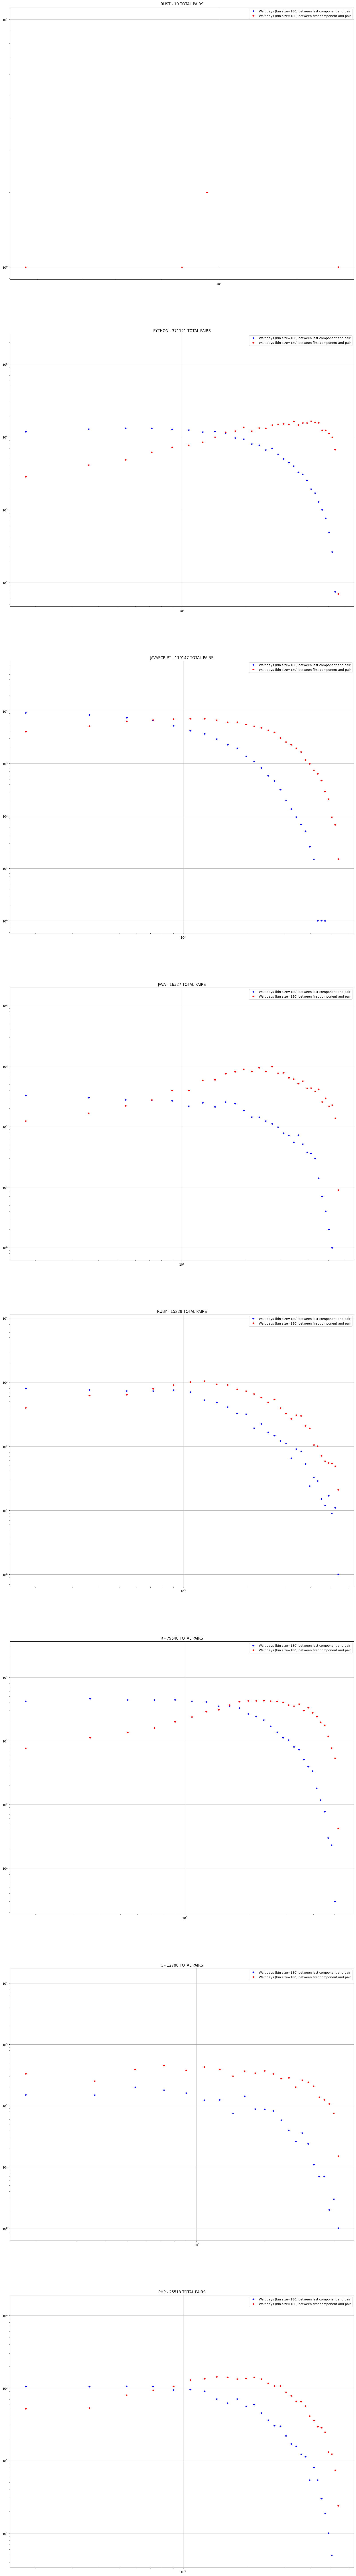

In [130]:
BIN_SIZE = 180
fig, axes = plt.subplots(nrows=len(LANGUAGES),ncols=1, figsize=(20,150))
for index, language in enumerate(LANGUAGES):
    plot_time_diffs(axes[index], language, bin_size=BIN_SIZE)
fig.savefig(f"time_diffs.jpg")


# 3D

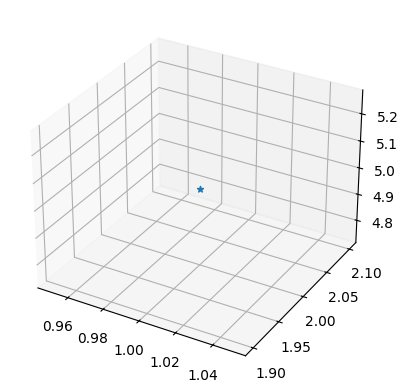

In [125]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Xs, Ys, Zs = [], [], []

for item in dates:
    Xs.append(item
ax.scatter([1.0], [2.0], [5.0], marker="*")